<a href="https://colab.research.google.com/github/envest99/CVRP_CPLEX_ENAEF_16062019/blob/master/Copy_of_CVRP_CPLEX_ENAEF_28062019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [0]:
pip install docplex

In [0]:
pip install CPLEX

In [0]:
n= 15
Q= 90
N= [i for i in range(1,n+1)]
V=[0] + N
#q={i:rnd.randint(1,10) for i in N}

In [0]:
loc_x = [8.5, 0, 5.1, 8.8, 10.6, 12, 15.7, 16.1, 12.6, 15, 10, 16, 8, 5.5, 4, 2.3]
loc_y = [6.8, 2.5, 2.75, 4.4, 0, 4, 1.4, 4.8, 7, 9.2, 10.9, 13.3, 12.8, 8.6, 13, 7.2]

In [0]:
q = {1: 23,
 2: 9,
 3: 29,
 4: 10,
 5: 21,
 6: 5,
 7: 11,
 8: 19,
 9: 30,
 10: 7,
 11: 16,
 12: 23,
 13: 15,
 14: 19,
 15: 21}

In [0]:
import matplotlib.pyplot as plt

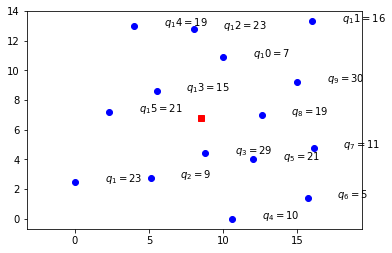

In [0]:
plt.scatter(loc_x[1:],loc_y[1:],c='b')
for i in N:
    plt.annotate('$q_%d=%d$'%(i,q[i]),(loc_x[i]+2,loc_y[i]))
plt.plot(loc_x[0],loc_y[0],c='r',marker='s')
plt.axis('equal');

In [0]:
A = [(i,j) for i in V for j in V if i!=j]
c = {(i,j):np.hypot(loc_x[i]-loc_x[j],loc_y[i]-loc_y[j]) for i,j in A}

In [0]:
from docplex.mp.model import Model

In [0]:
mdl = Model('CVRP')

In [0]:
x = mdl.binary_var_dict(A,name='x')
u = mdl.continuous_var_dict(N,ub=Q,name='u')

In [0]:
mdl.minimize(mdl.sum(c[i,j]*x[i,j] for i,j in A))
mdl.add_constraints(mdl.sum(x[i,j] for j in V if j!=i)==1 for i in N)
mdl.add_constraints(mdl.sum(x[i,j] for i in V if i!=j)==1 for j in N)
mdl.add_indicator_constraints(mdl.indicator_constraint(x[i,j],u[i]+q[j]==u[j]) for i,j in A if i!=0 and j!=0)
mdl.add_constraints(u[i]>=q[i] for i in N)
solution = mdl.solve(log_output=True)

TypeError: ignored

In [0]:
print(solution)

In [0]:
active_arcs = [a for a in A if x[a].solution_value>0.9]

In [0]:
solution.solve_status

In [0]:
active_arcs

In [0]:
plt.scatter(loc_x[1:],loc_y[1:],c='b')
for i in N:
    plt.annotate('$q_%d=%d$'%(i,q[i]),(loc_x[i]+2,loc_y[i]))
for i,j in active_arcs:
    plt.plot([loc_x[i],loc_x[j]],[loc_y[i],loc_y[j]],c='g', alpha=0.3)
plt.plot(loc_x[0],loc_y[0],c='r',marker='s')
plt.axis('equal');